# Finding Testdata

## Helper functions

In [102]:
import random

import matplotlib.pyplot as plt
import numpy as np
from rdkit.Chem import Mol
from rdkit.Chem.Descriptors import rdMolDescriptors as desc

import pubchem as pc
from mcs import find_largest_mcs


def has_heavy_atoms(m: Mol) -> bool:
    return desc.CalcNumHeavyAtoms(m) > 0

def analyze_bioassay(aid: int):
    mols = pc.mols_from_assay_id(aid)
    mols = list(filter(has_heavy_atoms, mols))

    heavy_atoms = list(map(desc.CalcNumHeavyAtoms, mols))

    plt.hist(heavy_atoms, bins=range(np.min(heavy_atoms), np.max(heavy_atoms)), edgecolor='black', alpha=0.7)
    plt.xlabel('Heavy Atoms')
    plt.ylabel('Frequency')
    plt.title('Heavy Atom Distribution')
    plt.show()


    mols_in_mcs, mcs_result = find_largest_mcs(mols)

    if mcs_result is None:
        print("could not compute mcs")
        return

    print("{} Molecules in original Assay".format(len(mols)))
    print("{} Molecules in MCS".format(len(mols_in_mcs)))
    print("{} Atoms in MCS".format(mcs_result.numAtoms))

    print("Random example Molecule in MCS:")
    display(mols_in_mcs[random.randint(0, len(mols_in_mcs))])

    print("MCS:")

    display(mcs_result.queryMol)


## Datasets

### Platalet activating factor receptor antagonists

From: <https://pubchem.ncbi.nlm.nih.gov/bioassay/1806504#section=Result-Definitions>

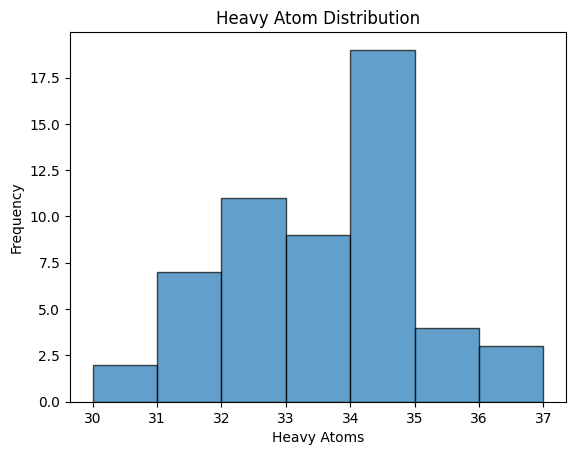

67 Molecules in original Assay
67 Molecules in MCS
28 Atoms in MCS
Random example Molecule in MCS:


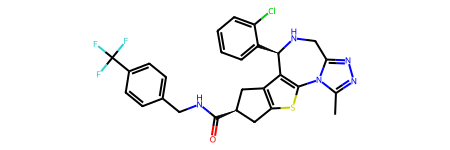

MCS:


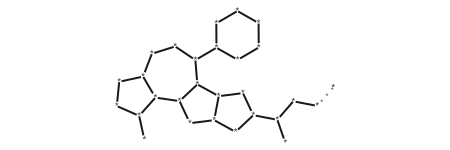

In [103]:
analyze_bioassay(1806504)

### Inhibitors of Influenza A virus A/WSN/1933(H1N1)) neuraminidase

From <https://pubchem.ncbi.nlm.nih.gov/protein/P03470>

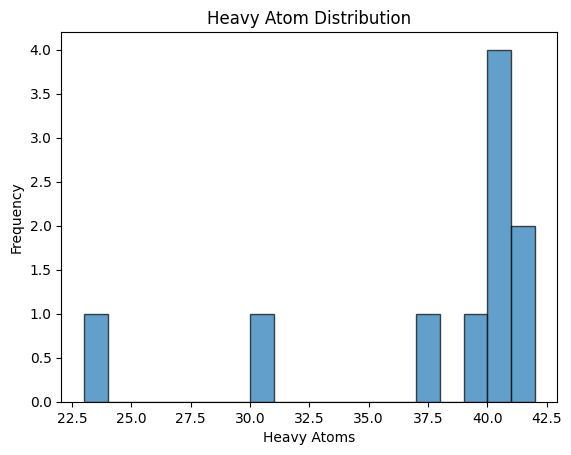

13 Molecules in original Assay
13 Molecules in MCS
23 Atoms in MCS
Random example Molecule in MCS:


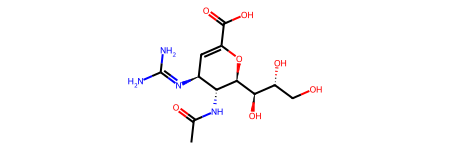

MCS:


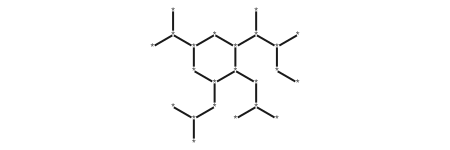

In [93]:
analyze_bioassay(716614)

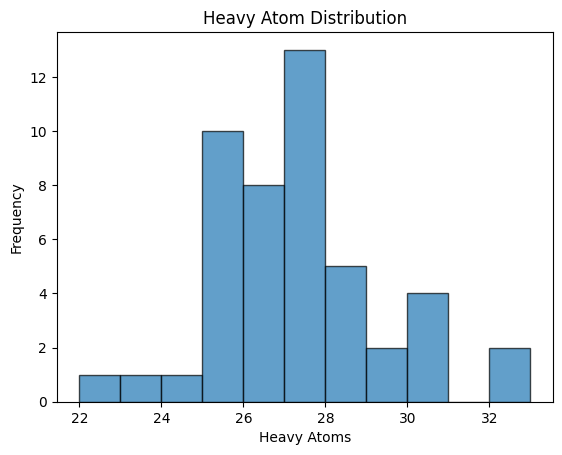

49 Molecules in original Assay
49 Molecules in MCS
16 Atoms in MCS
Random example Molecule in MCS:


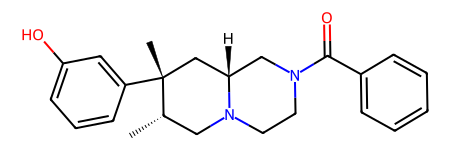

MCS:


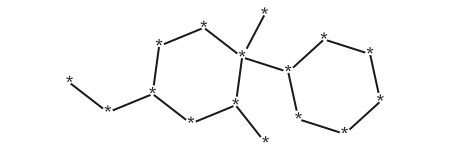

In [97]:
analyze_bioassay(274396)

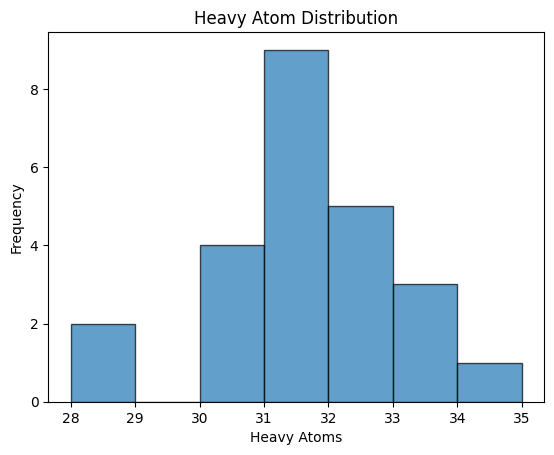

25 Molecules in original Assay
25 Molecules in MCS
14 Atoms in MCS
Random example Molecule in MCS:


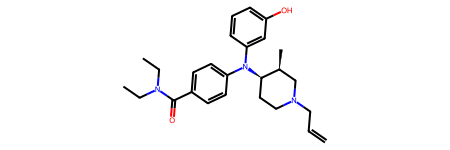

MCS:


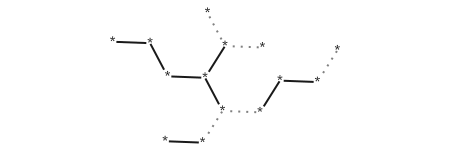

In [98]:
analyze_bioassay(152374)

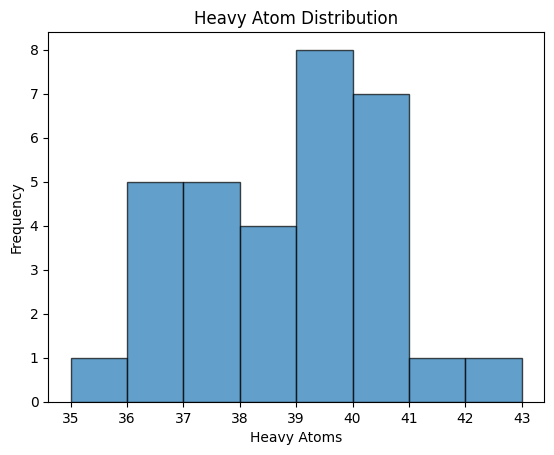

33 Molecules in original Assay
33 Molecules in MCS
28 Atoms in MCS
Random example Molecule in MCS:


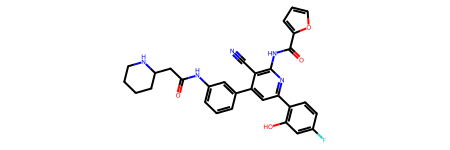

MCS:


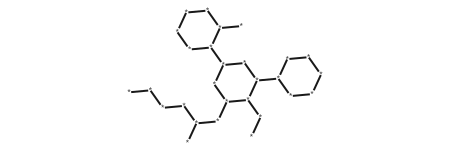

In [101]:
analyze_bioassay(492217)